<a href="https://colab.research.google.com/github/Labdhiiii/GIT-Learning/blob/master/Sentiment_Analysis_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import regex as re

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv(r'C:\Users\HP\Desktop\gsfc\Sem6\Internship\Sentiment_Analysis\training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None)

# Clean the dataset
data.columns = ['target', 'id', 'date', 'flag', 'user', 'text']
data = data[['target', 'text']]
data['text'] = data['text'].str.replace(r'http\S+|www\S+|https\S+', '', case=False)  # Remove URLs
data['text'] = data['text'].str.replace(r'@\w+', '', case=False)  # Remove mentions
data['text'] = data['text'].str.replace(r'#', '', case=False)  # Remove hashtags


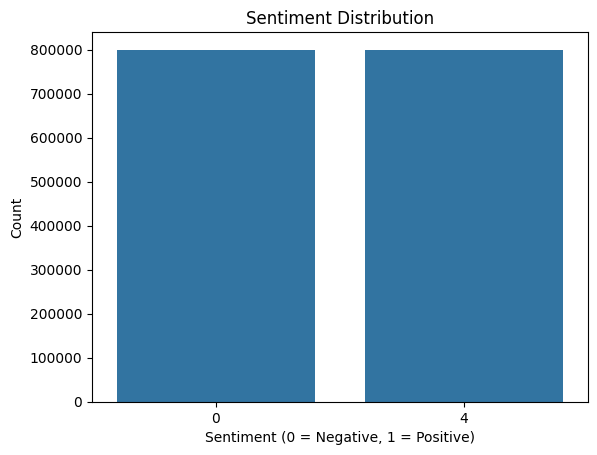

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize sentiment distribution
sns.countplot(x='target', data=data)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment (0 = Negative, 1 = Positive)')
plt.ylabel('Count')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Split the data
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['target'], test_size=0.2, random_state=42)

# Vectorize the text
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train the model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Evaluate the model
y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.79      0.80    159494
           4       0.80      0.81      0.80    160506

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000



In [ ]:
def predict_sentiment(text):
    cleaned = clean_input(text)
    vec_text = vectorizer.transform([cleaned])
    prediction = model.predict(vec_text)[0]
    label = "Positive " if prediction == 1 else "Negative"
    print(f"\nTweet: {text}")
    print(f"Predicted Sentiment: {label}")


In [ ]:
predict_sentiment("I love this product! Totally worth it.")
predict_sentiment("Worst experience ever. Wouldn’t recommend.")
predict_sentiment("It was okay, nothing special.")
predict_sentiment("Had a great time! Thank you.")
predict_sentiment("Terrible service and rude staff.")



Tweet: I love this product! Totally worth it.
Predicted Sentiment: Negative

Tweet: Worst experience ever. Wouldn’t recommend.
Predicted Sentiment: Negative

Tweet: It was okay, nothing special.
Predicted Sentiment: Negative

Tweet: Had a great time! Thank you.
Predicted Sentiment: Negative

Tweet: Terrible service and rude staff.
Predicted Sentiment: Negative


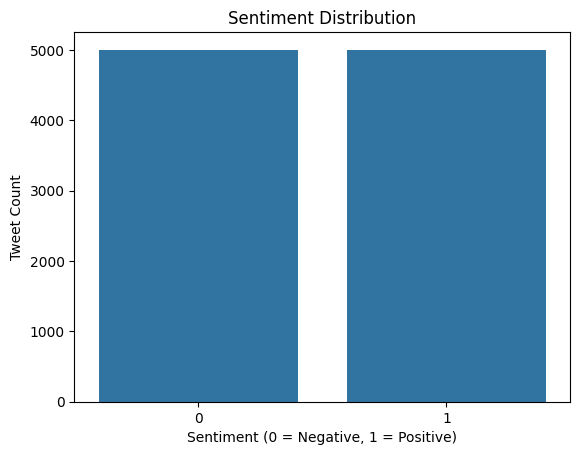


📊 Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       980
           1       0.74      0.76      0.75      1020

    accuracy                           0.74      2000
   macro avg       0.74      0.74      0.74      2000
weighted avg       0.74      0.74      0.74      2000



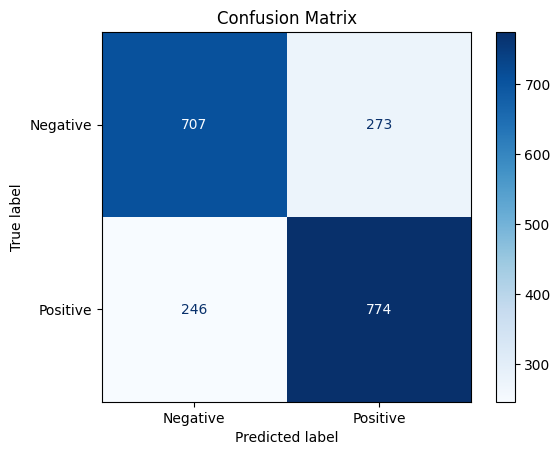


Tweet: I love this product! Totally worth it.
Predicted Sentiment: Positive 😊

Tweet: Worst experience ever. Wouldn’t recommend.
Predicted Sentiment: Negative 😠

Tweet: It's fine, not too great, not too bad.
Predicted Sentiment: Negative 😠

Tweet: Service was slow and staff was rude.
Predicted Sentiment: Positive 😊

Tweet: Amazing experience, will come again!
Predicted Sentiment: Positive 😊


In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load the dataset
file_path = r'C:\Users\HP\Desktop\gsfc\Sem6\Internship\Sentiment_Analysis\training.1600000.processed.noemoticon.csv'
data = pd.read_csv(file_path, encoding='latin-1', header=None)

# Assign column names
data.columns = ['target', 'id', 'date', 'flag', 'user', 'text']
data = data[['target', 'text']]

# Keep only positive (4) and negative (0)
data = data[data['target'].isin([0, 4])]
data['target'] = data['target'].apply(lambda x: 1 if x == 4 else 0)

# Clean text
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Remove URLs
    text = re.sub(r"@\w+", '', text)  # Remove mentions
    text = re.sub(r"#", '', text)  # Remove hashtags
    text = re.sub(r"[^\w\s]", '', text)  # Remove punctuation
    return text

data['text'] = data['text'].apply(clean_text)

# Optional: Use a sample to make training faster
data = data.sample(10000, random_state=42)

# Visualize sentiment distribution
sns.countplot(x='target', data=data)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment (0 = Negative, 1 = Positive)')
plt.ylabel('Tweet Count')
plt.show()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['target'], test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Evaluate model
y_pred = model.predict(X_test_vec)
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# --------- Prediction ---------

def clean_input(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r"@\w+", '', text)
    text = re.sub(r"#", '', text)
    text = re.sub(r"[^\w\s]", '', text)
    return text

def predict_sentiment(text):
    cleaned = clean_input(text)
    vec_text = vectorizer.transform([cleaned])
    prediction = model.predict(vec_text)[0]
    label = "Positive 😊" if prediction == 1 else "Negative 😠"
    print(f"\nTweet: {text}")
    print(f"Predicted Sentiment: {label}")

# Test with your own inputs
predict_sentiment("I love this product! Totally worth it.")
predict_sentiment("Worst experience ever. Wouldn’t recommend.")
predict_sentiment("It's fine, not too great, not too bad.")
predict_sentiment("Service was slow and staff was rude.")
predict_sentiment("Amazing experience, will come again!")

